In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
import pandas as pd
import os 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
gdrive_dir = "gdrive/My Drive/CS3244"
train_data_dir = os.path.join(gdrive_dir, "datasets/Train")
test_data_dir = os.path.join(gdrive_dir, "datasets/Test")
# train
subject_id_train_filepath = os.path.join(train_data_dir, "subject_id_train.txt")
X_train_filepath = os.path.join(train_data_dir, "X_train.txt")
y_train_filepath = os.path.join(train_data_dir, "y_train.txt")
# test
subject_id_test_filepath = os.path.join(test_data_dir, "subject_id_test.txt")
X_test_filepath = os.path.join(test_data_dir, "X_test.txt")
y_test_filepath = os.path.join(test_data_dir, "y_test.txt")
# features
features_filepath = os.path.join(gdrive_dir, "datasets/features.txt")

In [23]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
y_train_df.shape

(7767, 1)

In [24]:
# Read test data into pd
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)

X_test_df.columns = features
# X_test_df.insert(0, 'subject_id', subject_id_test)
# y_test.columns = ['label']

In [25]:
X_test_df.head()

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                         0.030914  ...                        -0.051074
1                         0.042548  ...                        -0.076825
2                         0.038297  ...                        -0.072302
3                         0.036205  ...                        -0.070079
4                         0.038034  ...                        -0.066849

[5 rows x 561 columns]

In [26]:
frames = [X_train_df, X_test_df]
result = pd.concat(frames)
result

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
3157                         0.052279  ...                         0.190104
3158                         0.073745  ...                         0.187748
3159                         0.068334  ...                         0.186527
3160                         0.023016  ...                         0.192865
3161                        -0.010846  ...                         0.193402

[10929 rows x 561 columns]

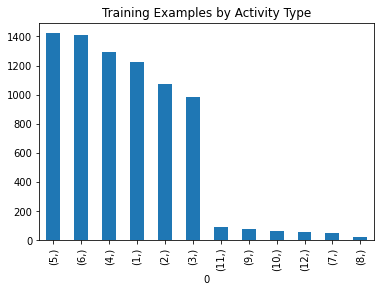

In [27]:
# histogram visualization of training data
# we know there are 12 labels
# y_train_df.hist(bins=y_train_df.max()[0])
y_train_df.value_counts().plot(kind='bar',
                          title='Training Examples by Activity Type')

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

result_transformed = sc.fit_transform(result)
result_transformed

array([[ 0.04229753, -0.04987031, -0.18730766, ..., -0.68490752,
         0.40378404, -0.00350964],
       [ 0.0020512 , -0.01173583, -0.1194426 , ..., -0.69185739,
         0.4049132 ,  0.01258021],
       [ 0.00693757, -0.04174955, -0.04670704, ..., -0.6999948 ,
         0.40604285,  0.03198754],
       ...,
       [ 0.28530967,  0.44474641, -0.06352887, ..., -0.32004781,
         0.71029105,  0.89169481],
       [-0.1595766 ,  0.33073808,  0.07595511, ..., -0.32860893,
         0.67885137,  0.91550876],
       [-0.49200392, -0.03162923, -0.21705211, ..., -0.32931876,
         0.67611038,  0.9175264 ]])

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
import numpy as np
lda = LDA()
X_lda = lda.fit_transform(result_transformed, np.ravel(pd.concat([y_train_df, y_test_df])))
X_lda.shape

(10929, 11)

In [30]:
lda.explained_variance_ratio_

array([0.60434446, 0.19352183, 0.06733791, 0.0480909 , 0.03632435,
       0.02301555, 0.00981925, 0.00939083, 0.00361127, 0.00287996,
       0.00166369])

In [31]:
X_train_lda = X_lda[0:7767]
X_test_lda = X_lda[7767:]

# model2 = LogisticRegression()
# model2.fit(X_train_lda, y_train_df)

From the above histogram, we observe that our data is highly imbalanced for labels concerning the transition of one position to the next compared to the labels for the positions. Even amongst the position labels, a small degree of imbalance can be observed; largest between position 3 and position 5.

Resampling may need to be considered.

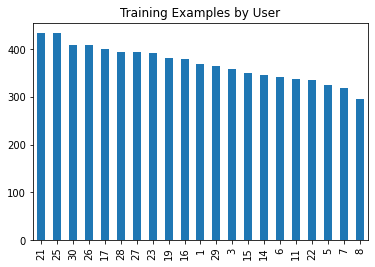

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
6594                         0.052110  ...                         0.368941
6595                         0.027060  ...                         0.376718
6596                         0.010848  ...                         0.387294
6597                         0.037183  ...                         0.406281
6598                         0.048483  ...                         0.408951

[6599 rows x 561 columns]

In [32]:
# Spliting of data set 
# We should split the data set by users rather than by a percentage
# Only worrying about having at least a few example records per activity is not sufficient (credit https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0 )

# X_train_df.hist(column="subject_id", bins = subject_id_train.max()[0])

X_train_df.insert(0, 'subject_id', subject_id_train)
X_train_df['subject_id'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()
# observed from the histogram, we have a decent spread of data among the participants in the training set

X_train = X_train_df[X_train_df['subject_id'] <= 27].drop(columns=['subject_id'])
X_val = X_train_df[X_train_df['subject_id'] > 27].drop(columns=['subject_id'])

X_train_df = X_train_df.drop(columns=['subject_id'])
X_train

In [33]:
X_train.describe()

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
count                      6599.000000  ...                      6599.000000
mean                          0.039174  ...                        -0.051755
std                           0.102584  ...                         0.274920
min                          -0.936967  ...                        -0.987874
25%                           0.031745  ...                        -0.133355
50%                           0.038904  ...                         0.008375
75%                           0.043995  ...                         0.129043
max                           1.000000  ...                         0.492224

[8 rows x 561 columns]

In [34]:
pd.DataFrame(X_test_df).describe()

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
count                      3162.000000  ...                      3162.000000
mean                          0.040530  ...                        -0.045618
std                           0.101559  ...                         0.239647
min                          -0.751552  ...                        -1.000000
25%                           0.031544  ...                        -0.096185
50%                           0.038861  ...                        -0.005486
75%                           0.043751  ...                         0.094051
max                           0.976950  ...                         0.972160

[8 rows x 561 columns]

In [35]:
y_train_df.insert(0, 'subject_id', subject_id_train)
y_train = y_train_df[y_train_df['subject_id'] <= 27]
y_val = y_train_df[y_train_df['subject_id'] > 27]
y_train = y_train.drop(columns=['subject_id'])
y_val = y_val.drop(columns=['subject_id'])
y_train_df = y_train_df.drop(columns=['subject_id'])

Epoch: 1/15	 cost: 7191.13878486	 val_acc: 0.7021
Epoch: 2/15	 cost: 3037.55832436	 val_acc: 0.8647
Epoch: 3/15	 cost: 2190.11547410	 val_acc: 0.8639
Epoch: 4/15	 cost: 1803.14712166	 val_acc: 0.8784
Epoch: 5/15	 cost: 1477.31436903	 val_acc: 0.8639
Epoch: 6/15	 cost: 1363.98654244	 val_acc: 0.8673
Epoch: 7/15	 cost: 1245.06620994	 val_acc: 0.8853
Epoch: 8/15	 cost: 1099.97324037	 val_acc: 0.8921
Epoch: 9/15	 cost: 988.42072758	 val_acc: 0.8896
Epoch: 10/15	 cost: 978.80890977	 val_acc: 0.9033
Epoch: 11/15	 cost: 886.70017414	 val_acc: 0.9041
Epoch: 12/15	 cost: 872.00220879	 val_acc: 0.9118
Epoch: 13/15	 cost: 821.22010644	 val_acc: 0.9170
Epoch: 14/15	 cost: 793.19598181	 val_acc: 0.9204
Epoch: 15/15	 cost: 732.11042320	 val_acc: 0.9152
Training Accuracy:  0.96075165
Test Accuracy:  0.87950665


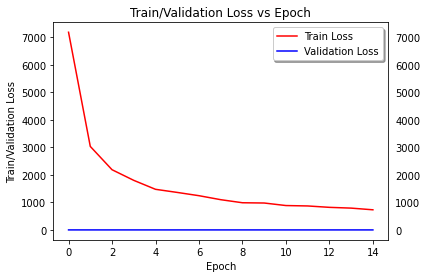

In [61]:
# PRE LDA
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X_train_pre = np.array(X_train_df[:6599]).astype(np.float32)
X_val_pre = np.array(X_train_df[6599:]).astype(np.float32)
y_train_pre = y_train.to_numpy().astype(np.float32).flatten()
y_train_pre = np.arange(1,13) == y_train_pre[np.newaxis,:].T 
y_val_pre = y_val.to_numpy().astype(np.float32).flatten()
y_val_pre = np.arange(1,13) == y_val_pre[np.newaxis,:].T 

train_perm = np.random.permutation(X_train_pre.shape[0])
X_train_pre = X_train_pre[train_perm,:]
y_train_pre = y_train_pre[train_perm,:]

val_perm = np.random.permutation(X_val_pre.shape[0])
X_val_pre = X_val_pre[val_perm,:]
y_val_pre = y_val_pre[val_perm,:]

X_test_pre = np.array(X_test_df).astype(np.float32)
y_test_pre = y_test_df.to_numpy().astype(np.float32).flatten()
y_test_pre = np.arange(1,13) == y_test_pre[np.newaxis,:].T

training_epochs = 15
batch_size = 1


X = tf.placeholder(tf.float32,[None,561])
Y = tf.placeholder(tf.float32,[None,12])
nhidden = 1024
W1 = tf.Variable(0.001*np.random.randn(X_train_pre.shape[1],nhidden).astype(np.float32), name='weights')
b1 = tf.Variable(0.001*np.random.randn(nhidden).astype(np.float32), name='bias')

W2 = tf.Variable(0.001*np.random.randn(nhidden,512).astype(np.float32), name='weights')
b2 = tf.Variable(0.001*np.random.randn(512).astype(np.float32), name='bias')

W3 = tf.Variable(0.001*np.random.randn(512,12).astype(np.float32), name='weights')
b3 = tf.Variable(0.001*np.random.randn(12).astype(np.float32), name='bias')

dropout1 = tf.placeholder(tf.float32,[])

h0 = tf.nn.dropout(tf.nn.relu(tf.matmul(X,W1) + b1), dropout1)

dropout2 = tf.placeholder(tf.float32,[])

h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(h0,W2) + b2), dropout2)

pred = tf.matmul(h1,W3)+b3

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(tf.nn.softmax(pred)+1e-10),reduction_indices=1))
# cost = tf.contrib.losses.hinge_loss(logits=pred, labels=Y)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred,1),tf.argmax(Y,1)), tf.float32))

learning_rate = tf.placeholder(tf.float32,[])

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(0.0005).minimize(cost)

loss = np.zeros(training_epochs)
loss_val = np.zeros(training_epochs)
val_acc = np.zeros(training_epochs)
init = tf.global_variables_initializer()

lr = 1e-4

with tf.Session() as sess:
	sess.run(init)
	for epoch in range(training_epochs):
		if epoch % 40 == 0:
			lr /= 2
		num_batches = int(X_train_pre.shape[0]/batch_size)
		curr_loss = 0
		perm = np.random.permutation(X_train_pre.shape[0])
		X_train_pre = X_train_pre[perm,:]
		y_train_pre = y_train_pre[perm,:]
		for i in range(num_batches):
			idxs = i*batch_size
			idxe = idxs + batch_size
			batch_x = X_train_pre[idxs:idxe,:] 
			batch_y = y_train_pre[idxs:idxe,:]
			
			_,c = sess.run([optimizer,cost], feed_dict={X:batch_x,Y:batch_y, dropout1:0.55, dropout2: 0.55, learning_rate:lr})
			curr_loss += c/batch_size
		loss[epoch] = curr_loss	
		loss_val[epoch] = cost.eval({X:X_val_pre, Y:y_val_pre, dropout1:1, dropout2:1})
		val_acc[epoch] = accuracy.eval({X:X_val_pre, Y:y_val_pre, dropout1:1, dropout2:1})

		print('Epoch: %d/%d\t cost: %.8f\t val_acc: %.4f' % (epoch+1,training_epochs, curr_loss, val_acc[epoch]))
	print("Training Accuracy: ", accuracy.eval({X:X_train_pre, Y:y_train_pre, dropout1:1, dropout2:1}))
	print("Test Accuracy: ", accuracy.eval({X:X_test_pre, Y:y_test_pre, dropout1:1, dropout2:1}))
	prediction=tf.argmax(pred,1)
	y_pred_pre = prediction.eval(feed_dict={X: X_test_pre, dropout1:1, dropout2:1}, session=sess)
	plt.plot(loss,'r-', label='Train Loss')
	plt.plot(loss_val,'b-', label='Validation Loss')
	plt.tick_params(labelright = True)
	plt.title('Train/Validation Loss vs Epoch')
	plt.ylabel('Train/Validation Loss')
	plt.xlabel('Epoch')
	plt.legend(['Train Loss', 'Validation Loss'], loc='upper right', shadow=True)
	plt.show()
 

In [40]:
y_pred_pre = np.array(y_pred_pre) + 1
import sklearn.metrics as metrics

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred_pre))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred_pre, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred_pre, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred_pre, average="weighted"))
print("Precision macro: ", metrics.precision_score(y_test_df, y_pred_pre, average="macro"))
print("Precision micro: ", metrics.precision_score(y_test_df, y_pred_pre, average="micro"))
print("Precision weighted: ", metrics.precision_score(y_test_df, y_pred_pre, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred_pre, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred_pre, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred_pre, average="weighted"))

Accuracy:  0.9171410499683744
F1 macro:  0.7754034650265133
F1 micro:  0.9171410499683744
F1 weighted:  0.9165084821726546
Precision macro:  0.7866425856674178
Precision micro:  0.9171410499683744
Precision weighted:  0.9205890138727743
Recall macro:  0.7769694747674049
Recall micro:  0.9171410499683744
Recall weighted:  0.9171410499683744


Epoch: 1/15	 cost: 4307.67818358	 val_acc: 0.9503
Epoch: 2/15	 cost: 969.96270067	 val_acc: 0.9615
Epoch: 3/15	 cost: 668.46730539	 val_acc: 0.9692
Epoch: 4/15	 cost: 533.73865266	 val_acc: 0.9692
Epoch: 5/15	 cost: 489.95591685	 val_acc: 0.9820
Epoch: 6/15	 cost: 463.33635733	 val_acc: 0.9769
Epoch: 7/15	 cost: 452.64009444	 val_acc: 0.9795
Epoch: 8/15	 cost: 426.30081498	 val_acc: 0.9795
Epoch: 9/15	 cost: 436.27702730	 val_acc: 0.9786
Epoch: 10/15	 cost: 410.91270055	 val_acc: 0.9760
Epoch: 11/15	 cost: 396.20338201	 val_acc: 0.9777
Epoch: 12/15	 cost: 392.71484375	 val_acc: 0.9812
Epoch: 13/15	 cost: 381.07223858	 val_acc: 0.9829
Epoch: 14/15	 cost: 379.49421173	 val_acc: 0.9812
Epoch: 15/15	 cost: 379.35921261	 val_acc: 0.9820
Training Accuracy:  0.98227006
Test Accuracy:  0.9734345


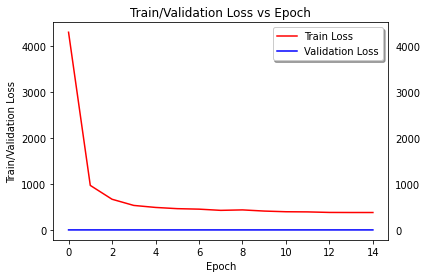

In [58]:
# MLP
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X_train_mlp = np.array(X_train_lda[:6599]).astype(np.float32)
X_val_mlp = np.array(X_train_lda[6599:]).astype(np.float32)
y_train_mlp = y_train.to_numpy().astype(np.float32).flatten()
y_train_mlp = np.arange(1,13) == y_train_mlp[np.newaxis,:].T 
y_val_mlp = y_val.to_numpy().astype(np.float32).flatten()
y_val_mlp = np.arange(1,13) == y_val_mlp[np.newaxis,:].T 

train_perm = np.random.permutation(X_train_mlp.shape[0])
X_train_mlp = X_train_mlp[train_perm,:]
y_train_mlp = y_train_mlp[train_perm,:]

val_perm = np.random.permutation(X_val_mlp.shape[0])
X_val_mlp = X_val_mlp[val_perm,:]
y_val_mlp = y_val_mlp[val_perm,:]

X_test_mlp = np.array(X_test_lda).astype(np.float32)
y_test_mlp = y_test_df.to_numpy().astype(np.float32).flatten()
y_test_mlp = np.arange(1,13) == y_test_mlp[np.newaxis,:].T

training_epochs = 15
batch_size = 1


X = tf.placeholder(tf.float32,[None,11])
Y = tf.placeholder(tf.float32,[None,12])
nhidden = 1024
W1 = tf.Variable(0.001*np.random.randn(X_train_mlp.shape[1],nhidden).astype(np.float32), name='weights')
b1 = tf.Variable(0.001*np.random.randn(nhidden).astype(np.float32), name='bias')

W2 = tf.Variable(0.001*np.random.randn(nhidden,512).astype(np.float32), name='weights')
b2 = tf.Variable(0.001*np.random.randn(512).astype(np.float32), name='bias')

W3 = tf.Variable(0.001*np.random.randn(512,12).astype(np.float32), name='weights')
b3 = tf.Variable(0.001*np.random.randn(12).astype(np.float32), name='bias')

dropout1 = tf.placeholder(tf.float32,[])

h0 = tf.nn.dropout(tf.nn.tanh(tf.matmul(X,W1) + b1), dropout1)

dropout2 = tf.placeholder(tf.float32,[])

h1 = tf.nn.dropout(tf.nn.relu(tf.matmul(h0,W2) + b2), dropout2)

pred = tf.matmul(h1,W3)+b3

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(tf.nn.softmax(pred)+1e-10),reduction_indices=1))
# cost = tf.contrib.losses.hinge_loss(logits=pred, labels=Y)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred,1),tf.argmax(Y,1)), tf.float32))

learning_rate = tf.placeholder(tf.float32,[])

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(0.0005).minimize(cost)

loss = np.zeros(training_epochs)
loss_val = np.zeros(training_epochs)
val_acc = np.zeros(training_epochs)
init = tf.global_variables_initializer()

lr = 1e-4

with tf.Session() as sess:
	sess.run(init)
	for epoch in range(training_epochs):
		if epoch % 40 == 0:
			lr /= 2
		num_batches = int(X_train_mlp.shape[0]/batch_size)
		curr_loss = 0
		perm = np.random.permutation(X_train_mlp.shape[0])
		X_train_mlp = X_train_mlp[perm,:]
		y_train_mlp = y_train_mlp[perm,:]
		for i in range(num_batches):
			idxs = i*batch_size
			idxe = idxs + batch_size
			batch_x = X_train_mlp[idxs:idxe,:] 
			batch_y = y_train_mlp[idxs:idxe,:]
			
			_,c = sess.run([optimizer,cost], feed_dict={X:batch_x,Y:batch_y, dropout1:0.55, dropout2: 0.55, learning_rate:lr})
			curr_loss += c/batch_size
		loss[epoch] = curr_loss	
		loss_val[epoch] = cost.eval({X:X_val_mlp, Y:y_val_mlp, dropout1:1, dropout2:1})
		val_acc[epoch] = accuracy.eval({X:X_val_mlp, Y:y_val_mlp, dropout1:1, dropout2:1})

		print('Epoch: %d/%d\t cost: %.8f\t val_acc: %.4f' % (epoch+1,training_epochs, curr_loss, val_acc[epoch]))
	print("Training Accuracy: ", accuracy.eval({X:X_train_mlp, Y:y_train_mlp, dropout1:1, dropout2:1}))
	print("Test Accuracy: ", accuracy.eval({X:X_test_mlp, Y:y_test_mlp, dropout1:1, dropout2:1}))
	prediction=tf.argmax(pred,1)
	y_pred= prediction.eval(feed_dict={X: X_test_mlp, dropout1:1, dropout2:1}, session=sess)
	plt.plot(loss,'r-', label='Train Loss')
	plt.plot(loss_val,'b-', label='Validation Loss')
	plt.tick_params(labelright = True)
	plt.title('Train/Validation Loss vs Epoch')
	plt.ylabel('Train/Validation Loss')
	plt.xlabel('Epoch')
	plt.legend(['Train Loss', 'Validation Loss'], loc='upper right', shadow=True)
	plt.show()
 

In [59]:
y_pred = np.array(y_pred) + 1

In [60]:
import sklearn.metrics as metrics

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision macro: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision micro: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision weighted: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

Accuracy:  0.9734345351043643
F1 macro:  0.9110384794349531
F1 micro:  0.9734345351043643
F1 weighted:  0.9734142903748173
Precision macro:  0.9208717368344925
Precision micro:  0.9734345351043643
Precision weighted:  0.9738582018983373
Recall macro:  0.9065880911370625
Recall micro:  0.9734345351043643
Recall weighted:  0.9734345351043643
